# 1.14

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_delta_t(delta_x, buffer):
    return 0.5 * np.square(delta_x) * buffer

### Initialization

In [2]:
space_steps = 101
    
delta_x = 1/(space_steps - 1)
delta_y = 1/(space_steps - 1)
delta_t = get_delta_t(delta_x, 0.5)

time_step_space = 0.01

time_steps = int(np.ceil(time_step_space / delta_t))

current_temperature = np.zeros((space_steps, space_steps))
next_temperature = np.zeros((space_steps, space_steps))
plot_data_beginning = []
plot_data_half = []
plot_data_end = []

alpha_x = delta_t / delta_x**2
alpha_y = delta_t / delta_y**2

# Preparing matrix A
A_x = np.zeros((space_steps, space_steps))
A_y = np.zeros((space_steps, space_steps))

#set boundaries
for x in range(space_steps):
    for y in range(space_steps):
        current_temperature[x][y] = (x / space_steps)**2 + (y / space_steps)**2
        next_temperature[x][y] = (x / space_steps)**2 + (y / space_steps)**2

plot_data_beginning = current_temperature.copy()

### Heat simulation

#### Step 1: Implicit Euler in x and y direction

In [3]:
# Time-stepping
for t in range(time_steps):
    np.fill_diagonal(A_x, 1 + 2 * alpha_x)
    np.fill_diagonal(A_x[:-1, 1:], -alpha_x)
    np.fill_diagonal(A_x[1:, :-1], -alpha_x)
    
    for i in range(space_steps):
        b = current_temperature[i][:].copy()
        # Adjust for boundary conditions in the vector b, if necessary
        b[0] += alpha_x * current_temperature[i][0]
        b[-1] += alpha_x * current_temperature[i][-1]
        next_temperature[i][:] = np.linalg.solve(A_x, b)
    
    np.fill_diagonal(A_y, 1 + 2 * alpha_y)
    np.fill_diagonal(A_y[:-1, 1:], -alpha_y)
    np.fill_diagonal(A_y[1:, :-1], -alpha_y)
    
    for j in range(space_steps):
        b = current_temperature[:][j].copy()
        # Adjust for boundary conditions in the vector b, if necessary
        b[0] += alpha_y * current_temperature[0][j]
        b[-1] += alpha_y * current_temperature[-1][j]
        next_temperature[:][i] = np.linalg.solve(A_y, b)
    
    current_temperature = next_temperature.copy()
    
    for i in range(space_steps):
        current_temperature[0][i] = (i / space_steps)**2
        current_temperature[-1][i] = 1 + (i / space_steps)**2
        current_temperature[i][0] = (i / space_steps)**2
        current_temperature[i][-1] = 1 + (i / space_steps)**2
    
    if(t == 1):
        plot_data_half = current_temperature.copy()

plot_data_end = current_temperature.copy()

### 3D Plot at the beginning

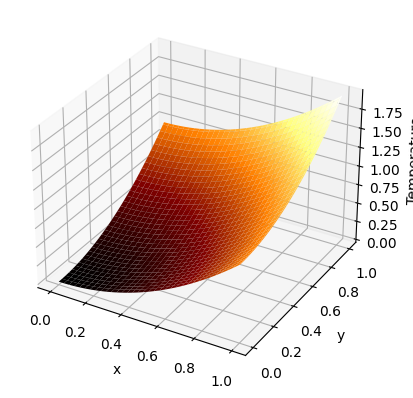

In [4]:
data_np = np.array(plot_data_beginning)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 1, space_steps)
y = np.linspace(0, 1, space_steps)
xg, yg = np.meshgrid(x, y)
ax.plot_surface(xg, yg, data_np, cmap='afmhot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperature')
plt.show()

### 3D Plot after half the time

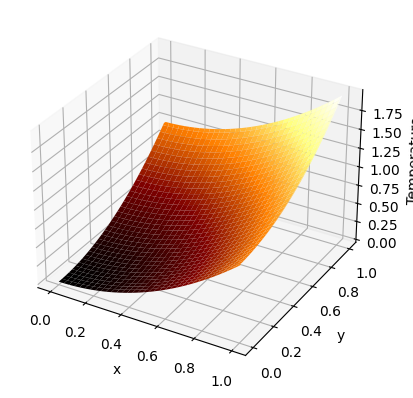

In [5]:
data_np = np.array(plot_data_half)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 1, space_steps)
y = np.linspace(0, 1, space_steps)
xg, yg = np.meshgrid(x, y)
ax.plot_surface(xg, yg, data_np, cmap='afmhot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperature')
plt.show()

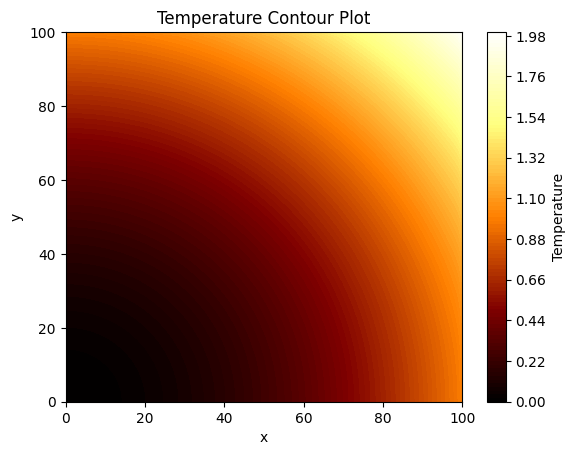

In [6]:
data_np = np.array(plot_data_half)

# Create a 2D contour plot
fig, ax = plt.subplots()
contour = ax.contourf(data_np, cmap='afmhot', levels=100)  # Adjust the number of levels as needed

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Temperature Contour Plot')

# Add a colorbar for reference
cbar = plt.colorbar(contour)
cbar.set_label('Temperature')

plt.show()

### 3D Plot at the end of the time

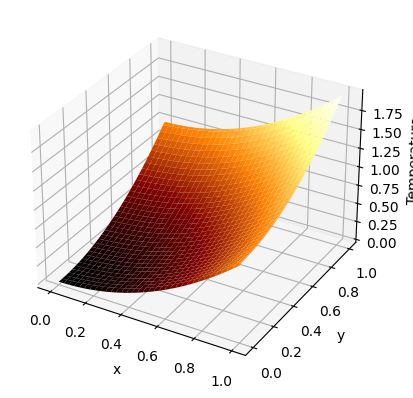

In [7]:
data_np = np.array(plot_data_end)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 1, space_steps)
y = np.linspace(0, 1, space_steps)
xg, yg = np.meshgrid(x, y)
ax.plot_surface(xg, yg, data_np, cmap='afmhot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperature')
plt.show()